# Assignment 2 - Question 4
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q4.ipynb`.
- Fill the Name and Roll number in the below markdown

Name:Katha rohan reddy <br>
Roll Number:2020101039

## Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [45]:
import csv
import random
import numpy as np

In [46]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 4.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

4.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

### Linear regresssion
In Linear regression the y_pred is given by f(wx+b) mse is used as loss function<br>
First we have to inititalize the weight and bias parameters randomly <br>
Then we have to caluculate mse if it is less than 0.000 then it should be consideres converged<br>
Afterwards then we have to apply gradient descent and hence correct the weights<br>
Then caluculate the mse again <br>



<!-- your answer to 1.1.1 -->

4.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

4.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

It is done by with the help of hessian matrix
n_opt is 0.8

In [47]:
def mse (actual, predict,x):
    sum = 0
    actual = np.array(actual)
    for i in range(np.size(x,1)):
       diff = actual[i]-predict[i]
       sum = sum + diff*diff
    return sum/np.size(x,1)
def mse_diff(actual,predict,x):
    sum = 0
    actual = np.array(actual)
    x = np.array(x)
    for i in range(np.size(x,1)):
       diff = (predict[i]-actual[i])*x[i]
       sum = sum + diff

    return 2*sum/np.size(x,1)
def mse_diff_bias(actual,predict,x):
    sum = 0
    actual = np.array(actual)
    for i in range(np.size(x,1)):
       diff = (predict[i]-actual[i])
       sum = sum + diff

    return 2*sum/np.size(x,1)
    

 
# best learning rate is given by 2/max(lamda) where lamda are given by hermitian matrix of mse 

def optn():
    #initial
    n = 0.8
    x = np.random.randint(size=1,low=0,high = 4)
    y = np.random.randint(size=1,low=0,high = 4)
    w = np.random.randint(size=(2),low = 0,high = 10)
    val1 = np.sum(x_train,x_train)/np.size(x_train,1)
    val2 = np.sum(y_train,y_train)/np.size(y_train,1)
    val3 = np.sum(x_train,y_train)/np.size(y_train,1)
    Hessian =  np.array([[val1,val3],[val3,val2]])
# eigen values of hessian matrix
    X = np.linalg.eigvals(np.linalg.inv(Hessian))
    n_opt = min(X[0],X[1])*2
    return n_opt



    
# implement Linear Regression
w = np.random.rand(4)
b = np.random.rand(1)
list_y =[np.dot(w,i)+ b for i in x_train]

list_nopt = []
list_mse = []
for k in range(1,20):
 list_nopt.append(k/10)
 for i in range(10000):
    if(i == 0):
       list_mse.append(mse(y_train,list_y,x_train))
    if(mse(y_train,list_y,x_train) < 0.000001):
        break
    else:
        w = w-mse_diff(y_train,list_y,x_train)*(k/10)
        b = b-mse_diff_bias(y_train,list_y,x_train)*(k/10)
        list_y =[np.dot(w,i)+ b for i in x_train]
        
        

y_pred = [np.dot(w,i)+b for i in x_test]

print(list_nopt,list_mse)
#best value is achieved at 0.8


[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9] [array([1.20097374]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07]), array([9.98269298e-07])]


4.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

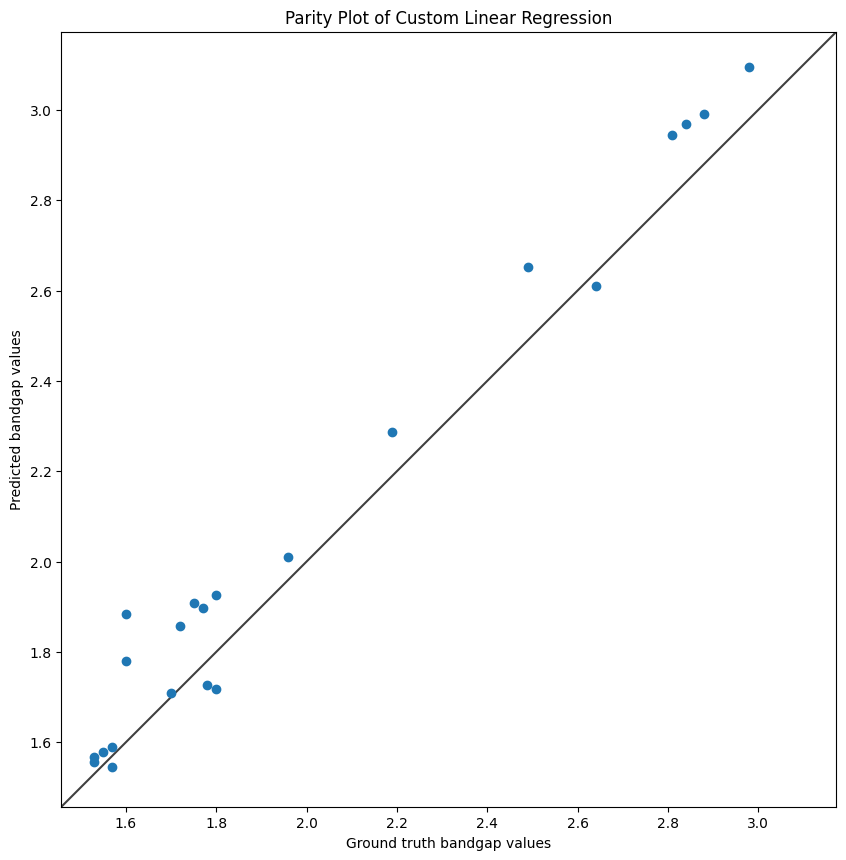

In [48]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()


### 4.2 Implement Ridge regression
4.2.1 Explain Ridge regression briefly in 1-2 lines.
<br>
Ridge regression is the technique to implement linear regression with l2 regularization <br>
It helps us in preventing over fitting

<!-- Your answer to 1.2.1 -->

4.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

The alpha term helps us in regularization and <br>
it will penalize the parameters which have overfit the data <br>
With regularization, the number of features used in training is kept constant, yet the magnitude of the coefficients
When the alpha increase the rsme increases monotonously
<br>

[0.11882284030135112, 0.12690565495587097, 0.1570867449951014, 0.18599450199493628, 0.210664379749763, 0.23150966865987502, 0.2492848862964892, 0.26462973854849864, 0.2780336006552877, 0.2898651550555516]


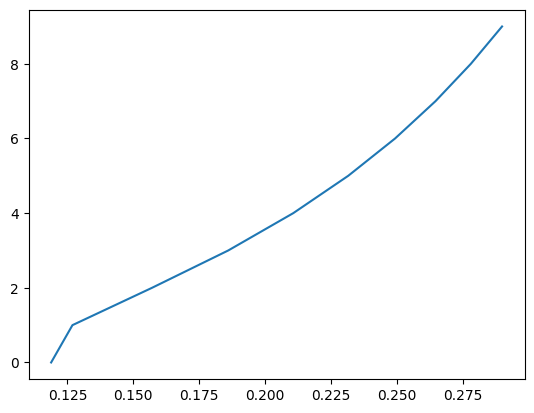

In [49]:
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
list_rsme = []
list_a = []
for i in range(10):
   list_a.append(i)
   ridgeclassifier = Ridge(alpha=i)
   ridgeclassifier.fit(x_train,y_train)
   y_pred = ridgeclassifier.predict(x_test)
   rmse = mean_squared_error(y_test, y_pred, squared=False)
   list_rsme.append(rmse)

print(list_rsme)
plt.plot(list_rsme,list_a)
plt.show()


### 4.3 Implement Lasso regression
4.3.1 Explain Lasso regression briefly in 1-2 lines.

The lasso regression is l1 regularization here penalty term is added to mse <br> and it is used to avoid overfitting


4.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

Here Rmse is being indepented on alpha as the differention leads to constant term lamda unlike in ridge regression

[0.11882284030135123, 0.5054452920439346, 0.5054452920439346, 0.5054452920439346, 0.5054452920439346, 0.5054452920439346, 0.5054452920439346, 0.5054452920439346, 0.5054452920439346, 0.5054452920439346]


/var/folders/jp/ygn5sqhj67d7g7973sn3pt440000gn/T/ipykernel_2711/997535903.py:55: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  Lassoclassifier.fit(x_train,y_train)
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.585e-01, tolerance: 1.657e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_co

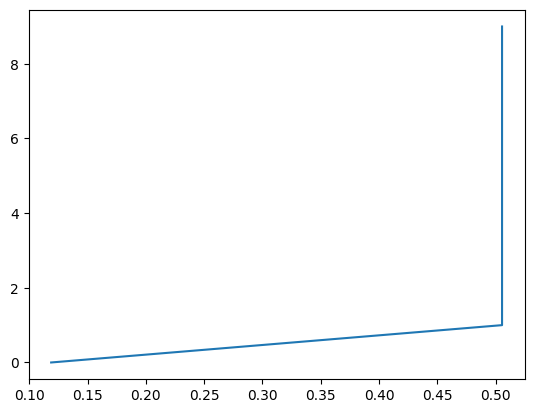

In [50]:
# implement Lasso regression and make a table where you explore the effect of different values of
#  `alpha`
'''
def mse_lasso(actual, predict,x,lamda,w):
    sum = 0
    actual = np.array(actual)
    for i in range(np.size(x,1)):
       diff = actual[i]-predict[i]
       sum = sum + diff*diff + lamda*(abs(w[i]))
    return sum/np.size(x,1)
def mse_diff_lasso(actual,predict,x,lamda,w):
    sum = 0
    actual = np.array(actual)
    x = np.array(x)
    for i in range(np.size(x,1)):
       diff = (predict[i]-actual[i])*x[i]*2
       if(w[i] < 0):
         sum = (sum + diff - lamda)/np.size(x,1)
       else:
         sum = (sum + diff + lamda)/np.size(x,1)
       
    return sum 
def mse_diff_bias_lasso(actual,predict,x):
    sum = 0
    actual = np.array(actual)
    for i in range(np.size(x,1)):
       diff = (predict[i]-actual[i])
       sum = sum + diff

    return sum/2*np.size(x,1)
    
w = np.random.rand(4)
b = np.random.rand(1)
list_y =[np.dot(w,i)+ b for i in x_train]


for i in range(10000):
    if(mse_lasso(y_train,list_y,x_train,2,w) < 0.01):
        break
    else:
        w = w-mse_diff_lasso(y_train,list_y,x_train,2,w)*0.1
        b = b-mse_diff_bias_lasso(y_train,list_y,x_train)*0.1
        list_y =[np.dot(w,i)+ b for i in x_train]
        

y_pred = [np.dot(w,i)+b for i in x_test]
print(list_y)
print(y_train)
'''
list_rsme_lasso = []
list_a = []
for i in range(10):
   list_a.append(i)
   Lassoclassifier = Lasso(alpha=i)
   Lassoclassifier.fit(x_train,y_train)
   y_pred = Lassoclassifier.predict(x_test)
   rmse = mean_squared_error(y_test, y_pred, squared=False)
   list_rsme_lasso.append(rmse)

print(list_rsme_lasso)
plt.plot(list_rsme_lasso,list_a)
plt.show()